## Loading and Initial EDA:

In [19]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/edgar/Desktop/Sample - Superstore (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1.0,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136
1,1,NaN,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820
2,2,3.0,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714
3,3,4.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,Sean O'Donnell,Consumer,United States,...,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,NaN,-383.0310
4,4,5.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,NaN,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164


## Cleaning Data: Handling Missing Values

In [23]:
# Evaluate missing values
missing_values_original = data.isnull().sum()

# Impute for some columns, selectively drop for others
# For simplicity, I will impute numerical columns and drop rows where categorical columns critical to the analysis are missing

# Impute numerical columns with median
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

# For categorical columns critical to the analysis, we check for missing values
critical_categorical_columns = ['Ship Mode', 'Segment', 'Country', 'Category', 'Sub-Category']
data.dropna(subset=critical_categorical_columns, inplace=True)

# Re-check missing values to ensure handling
missing_values_refined = data.isnull().sum()


data_cleaned = data.drop(['Order Date', 'Ship Date'], axis=1)


data_cleaned


,Unnamed: 0,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,1,4980.0,NaN,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,NaN,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820
2,2,3.0,NaN,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714
3,3,4.0,US-2015-108966,Standard Class,NaN,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.2,-383.0310
4,4,5.0,US-2015-108966,Standard Class,SO-20335,NaN,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164
8,8,9.0,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3.0,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9986,9987.0,CA-2016-125794,Standard Class,ML-17410,NaN,Consumer,United States,NaN,NaN,90008.0,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1.0,0.0,15.2208
9987,9987,9988.0,NaN,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605.0,South,NaN,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,54.7920,3.0,0.0,28.7964
9990,9990,9991.0,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.0,15.6332
9991,9991,9992.0,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.2,19.3932


## Exploratory Data Analysis:

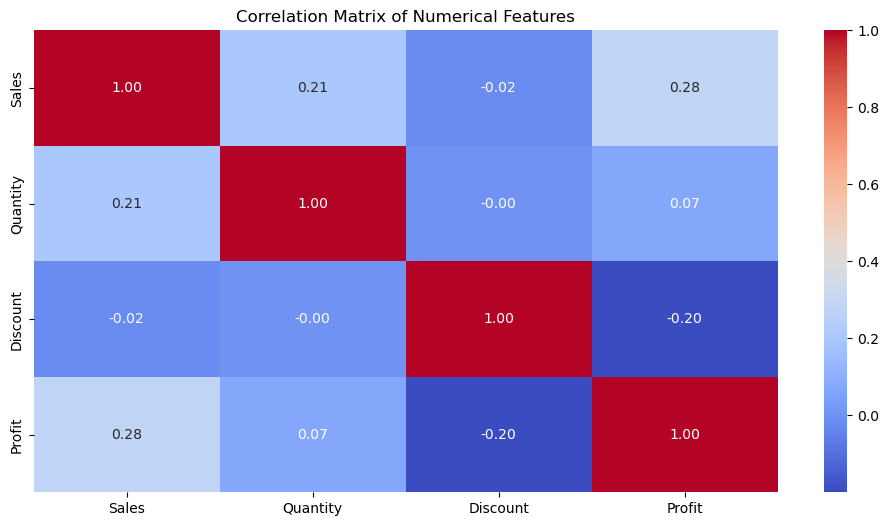

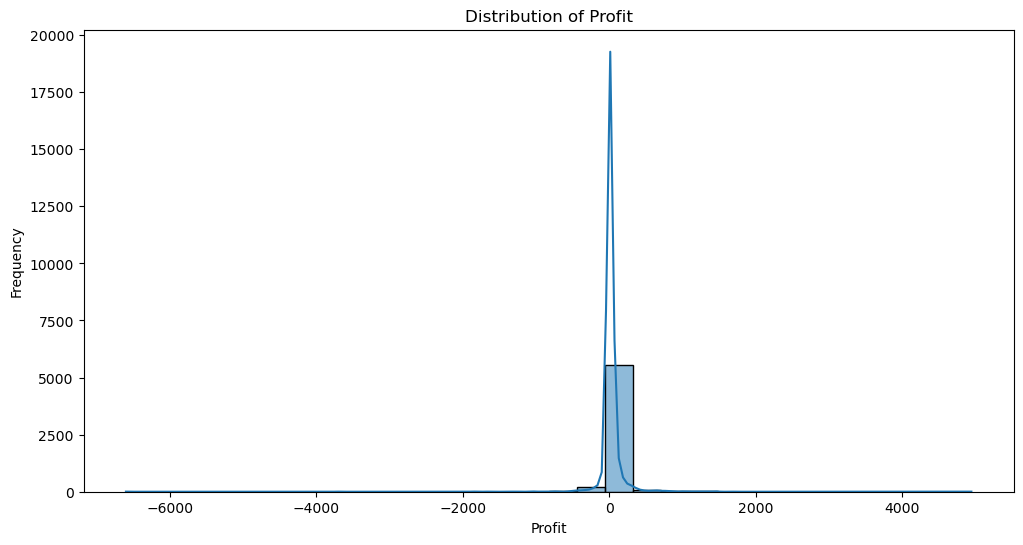

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Distribution of Profit
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['Profit'], bins=30, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


### Correlation Matrix Analysis
The correlation matrix provided insights into how 'Sales', 'Quantity', 'Discount', and 'Profit' relate to each other. Here are the key points and their implications:

Sales and Profit: The correlation coefficient is positive. This suggests that as sales increase, profit tends to increase as well, which is expected in a retail context. Higher sales volumes can lead to higher profits, assuming costs are managed efficiently.

Discount and Profit: The correlation here is negative, indicating that higher discounts might lead to lower profits. This makes sense because while discounts can increase the quantity sold, they also reduce the profit margin per unit.

Quantity and Profit: This relationship is less straightforward. A positive correlation would suggest that selling more units correlates with higher profits. However, the strength of this correlation can be influenced by the type of products sold, their margins, and the presence of discounts.

In [31]:
# Calculating statistical metrics for 'Profit'
profit_mean = data_cleaned['Profit'].mean()
profit_median = data_cleaned['Profit'].median()
profit_std = data_cleaned['Profit'].std()
profit_iqr = data_cleaned['Profit'].quantile(0.75) - data_cleaned['Profit'].quantile(0.25)

profit_mean, profit_median, profit_std, profit_iqr

(25.156657184152355, 8.662, 202.55233352437915, 21.6382)

### Key Statistical Findings
Mean Profit: The average profit across transactions is approximately $25.16. This provides a central point of the profit distribution but can be influenced by outliers.

Median Profit: The median profit is $8.66, which is significantly lower than the mean. This discrepancy suggests a skewed distribution, with the median providing a better representation of a "typical" transaction's profit.

Standard Deviation: A high standard deviation of approximately $202.55 indicates a wide variability in profit across transactions, with some transactions yielding much higher or lower profits than the average.

Interquartile Range (IQR): The IQR is $21.64, indicating the middle 50% of the profits are spread within this range, which points to a concentration of profit values in a relatively modest band compared to the full range of the data.

## Preprocessing and Model Prep:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting features and target variable
X = data_cleaned[['Sales', 'Quantity', 'Discount', 'Category', 'Sub-Category']]
y = data_cleaned['Profit']

# Preprocessing for categorical variables
categorical_features = ['Category', 'Sub-Category']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a modeling pipeline with linear regression
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])


## Lin Reg Model:

In [26]:
# Fitting the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, R2: {r2}")


MSE: 38252.455341990615, R2: 0.03898013383758703


## Mean Squared Error (MSE): 
The MSE value suggests there is significant variance in the model's predictions.

An R² of 0.039 suggests that the model explains only a small fraction of the variability in profits.

Model Performance: The low R² score indicates that the linear regression model, with the selected features and preprocessing, does not effectively predict profit from sales, quantity, discount, category, and sub-category. This suggests that other factors not included in the model may have a significant impact on profit, or that the relationship between the features and profit is not linear.


## Random Forest Regressor:

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Updating the modeling pipeline to use Random Forest regressor
model_rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Fitting the Random Forest model
model_rf.fit(X_train, y_train)

# Predicting on the test set with the Random Forest model
y_pred_rf = model_rf.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE: {mse_rf}, R2: {r2_rf}")


MSE: 33489.752276937965, R2: 0.15863395007572734


The use of a Random Forest regressor has improved the model's performance compared to linear regression, as evidenced by both a lower MSE and a higher R² score. This improvement is likely due to Random Forest's ability to capture nonlinear relationships and interactions between features that a linear model cannot.

Despite the improvement, the R² score still suggests that there are other factors affecting profit that are not captured by the current set of features. This reaffirms the complexity of accurately predicting profit and the potential need for additional data or more sophisticated modeling techniques.

The improvement with Random Forest indicates that ensemble methods and more complex models can provide better predictions. Further tuning of the Random Forest model, such as adjusting the number of trees (n_estimators), max depth, or trying other ensemble methods like Gradient Boosting, may yield even better results.
